# PS8

Tyler Amos

MACSS 30100

March 12 2018

# (a)

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/UC-MACSS/persp-model_W18/master/ProblemSets/PS8/data/strongdrink.txt')
                 
                 

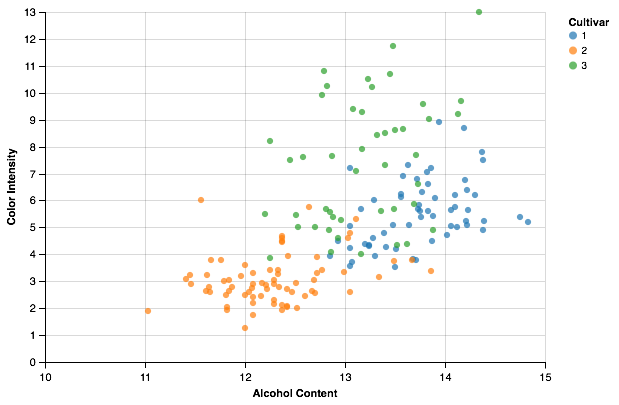

In [108]:
# you may need to install altair: https://altair-viz.github.io/installation.html

# and run the command below in the terminal to reproduce this plot

#jupyter nbextension enable vega --py --sys-prefix

df_plot = df.copy()

df_plot['Cultivar'] = df['cultivar'].astype('category')

alt.Chart(title = 'C', data = df_plot).mark_circle().encode(
    x=alt.X('alco', axis=alt.Axis( title='Alcohol Content'),
            scale=alt.Scale(domain=(10, 15))),
    y=alt.Y('color_int', axis=alt.Axis(title='Color Intensity')),
    color = 'Cultivar')

# (b)

In [109]:
df_b = df.copy()
df_b = df_b[df_b['cultivar'] != 3]
x_data = df_b[['alco', 'malic', 'tot_phen', 'color_int']]
x_data['constant'] = 1 # Add constant
x_data = x_data.values
y_data = np.ravel(df_b['cultivar'])
kf = KFold(n_splits = 4, shuffle = True, random_state = 22)

def task_b(solver, C_val, penalty_val):
    MSE_vec_kf = []
    for train_id, test_id in kf.split(x_data):
        x_train, x_test = x_data[train_id], x_data[test_id]
        y_train, y_test = y_data[train_id], y_data[test_id]
        multi_log = LogisticRegression(multi_class = 'multinomial',
                                       solver = solver, C = C_val, penalty = penalty_val)
        multi_log.fit(x_train, y_train)
        y_pred = multi_log.predict(x_test)
        MSE_vec_kf.append(((y_test - y_pred) ** 2).mean())
    print("SOLVER: {}, C: {}, PENALTY {}, \n MSE {}\n".format(solver, C_val,
                                                            penalty_val, 
                                                            np.mean(MSE_vec_kf)
                                                          ))

for i in range(1, 10):
    task_b('newton-cg', i, 'l2')

print("MSE reaches a minimum after C = 3")


for i in range(1, 10):
    task_b('saga', i, 'l1')

print("MSE again reaches a minimum after C = 3")



/anaconda3/envs/persp_model_18/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


SOLVER: newton-cg, C: 1, PENALTY l2, 
 MSE 0.11482007575757576

SOLVER: newton-cg, C: 2, PENALTY l2, 
 MSE 0.11482007575757576

SOLVER: newton-cg, C: 3, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 4, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 5, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 6, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 7, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 8, PENALTY l2, 
 MSE 0.10724431818181818

SOLVER: newton-cg, C: 9, PENALTY l2, 
 MSE 0.10724431818181818

MSE reaches a minimum after C = 3
SOLVER: saga, C: 1, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 2, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 3, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 4, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 5, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 6, PENALTY l1, 
 MSE 0.1387310606060606

SOLVER: saga, C: 7, PENALTY l1, 
 MSE 0.13

/anaconda3/envs/persp_model_18/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# (c)

In [110]:
df_c = df.copy()
x_data = df_c[['alco', 'malic', 'tot_phen', 'color_int']]
y_data = df_c['cultivar'].astype('category')

def rforclass(d,e,m):

    clf = RandomForestClassifier(random_state = 22,
                             bootstrap = True,
                            oob_score = True,
                             max_depth = d,
                             n_estimators = e,
                             min_samples_leaf = m)

    clf.fit(x_data, y_data)
    error = 1 - clf.oob_score_
    return error

d_range = np.arange(1, 10,1)
e_range = np.arange(20,50,1)
m_range = np.arange(1, 5, 1)

from itertools import product

combos = product(d_range, e_range, m_range)

results = []
d_list = []
e_list = []
m_list = []

for d, e, m in combos:
    d_list.append(d)
    e_list.append(e)
    m_list.append(m)
    results.append(rforclass(d,e,m))
    



There doesn't seem to be any improvement in errors past depth = 5. So let us set that parameter at 5.


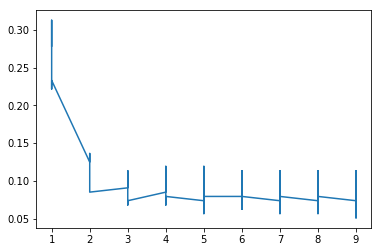

In [111]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

def three_d_plot(e_list, m_list, results):
    # From: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    # https://stackoverflow.com/questions/8722735/i-want-to-use-matplotlib-to-make-a-3d-plot-given-a-z-function#8723033
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X, Y = np.meshgrid(np.array(e_list), np.array(m_list))
    Z = np.array([results])

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
    
print("There doesn't seem to be any improvement in errors past depth = 5. So let us set that parameter at 5.")
plt.plot(d_list, results)

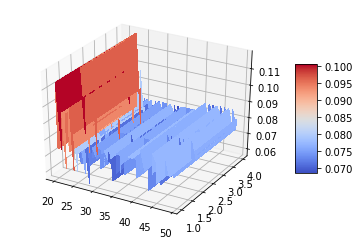

In [105]:
# using d = 5
e_range = np.arange(20,50,1)
m_range = np.arange(1, 5, 1)

from itertools import product

combos = product([5], e_range, m_range)

results = []
e_list = []
m_list = []

for d, e, m in combos:
    e_list.append(e)
    m_list.append(m)
    results.append(rforclass(d,e,m))
    
three_d_plot(e_list, m_list, results)


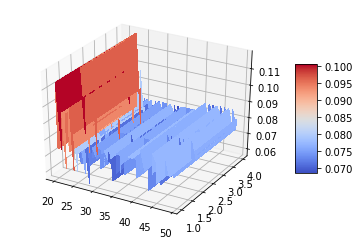

In [95]:
def three_d_plot(e_list, m_list, results):
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = np.meshgrid(np.array(e_list), np.array(m_list))
Z = np.array([results])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# (d)

# (e)

# (f)